In [5]:
#!rm -rf /notebooks/tokyo_map_images
#!unzip /notebooks/japan_tokyo_dataset.zip -d /notebooks/tokyo_map_images

In [1]:
# Install the ultralytics package from GitHub
!pip install git+https://github.com/ultralytics/ultralytics.git@main

  Cloning https://github.com/ultralytics/ultralytics.git (to revision main) to /tmp/pip-req-build-vmft2rao
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-vmft2rao
  Resolved https://github.com/ultralytics/ultralytics.git to commit bc5b528ca78c67a689ce6001af963aaa1a5b2d5e
  Preparing metadata (setup.py) ... done
  Created wheel for ultralytics: filename=ultralytics-8.0.229-py3-none-any.whl size=663190 sha256=be18ff0710454759ccbf78f6369c6f17b5eaebcb3686b0fd5779d91d18b91897
  Stored in directory: /tmp/pip-ephem-wheel-cache-mran2_mv/wheels/c3/eb/34/5edd3a3a0704c89351b67d8967a3690c118940addba327e5f0
Successfully built ultralytics


In [2]:
#!wget https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8x-seg.pt

In [12]:
!rm -rf /notebooks/japan_tokyo_dataset.zip
!rm -rf /notebooks/japan_tokyo_dataset
!rm -rf /notebooks/runs

In [13]:
!unzip /notebooks/japan_tokyo_dataset.zip -d /notebooks/japan_tokyo_dataset_parent

Archive:  /notebooks/japan_tokyo_dataset.zip
   creating: /notebooks/japan_tokyo_dataset_parent/japan_tokyo_dataset/
   creating: /notebooks/japan_tokyo_dataset_parent/japan_tokyo_dataset/images/
   creating: /notebooks/japan_tokyo_dataset_parent/japan_tokyo_dataset/labels/
  inflating: /notebooks/japan_tokyo_dataset_parent/japan_tokyo_dataset/dataset.yaml  
   creating: /notebooks/japan_tokyo_dataset_parent/japan_tokyo_dataset/images/train/
   creating: /notebooks/japan_tokyo_dataset_parent/japan_tokyo_dataset/images/val/
   creating: /notebooks/japan_tokyo_dataset_parent/japan_tokyo_dataset/labels/train/
   creating: /notebooks/japan_tokyo_dataset_parent/japan_tokyo_dataset/labels/val/
  inflating: /notebooks/japan_tokyo_dataset_parent/japan_tokyo_dataset/images/train/12_4.png  
  inflating: /notebooks/japan_tokyo_dataset_parent/japan_tokyo_dataset/images/train/13_84.png  
  inflating: /notebooks/japan_tokyo_dataset_parent/japan_tokyo_dataset/images/train/14_99.png  
  inflating: /no

In [14]:
!mv /notebooks/japan_tokyo_dataset_parent/japan_tokyo_dataset /notebooks/japan_tokyo_dataset
!rm -rf /notebooks/japan_tokyo_dataset_parent

# Fix /notebooks/japan_tokyo_dataset/dataset.yaml first line
!sed -i '1s/^/path: \/notebooks\/japan_tokyo_dataset\n/' /notebooks/japan_tokyo_dataset/dataset.yaml

In [ ]:
yolo detect train data=/notebooks/japan_tokyo_dataset/dataset.yaml model=notebooks/yolov8n-seg.pt epochs=1000 imgsz=512

In [13]:
!rm -rf /notebooks/coco_converted

In [11]:
#from ultralytics.data.converter import convert_coco

#convert_coco(labels_dir='/notebooks/japan_tokyo_dataset', use_segments=True)

COCO data converted successfully.
Results saved to /notebooks/coco_converted2


In [1]:
from ultralytics import YOLO

model = YOLO('/notebooks/runs/segment/train2/weights/best.pt')



0: 512x512 (no detections), 7.5ms
Speed: 4.8ms preprocess, 7.5ms inference, 0.5ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/segment/predict
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'minor', 1: 'service', 2: 'tertiary', 3: 'rail', 4: 'primary', 5: 'secondary', 6: 'motorway', 7: 'trunk', 8: 'path', 9: 'taxiway', 10: 'river'}
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255

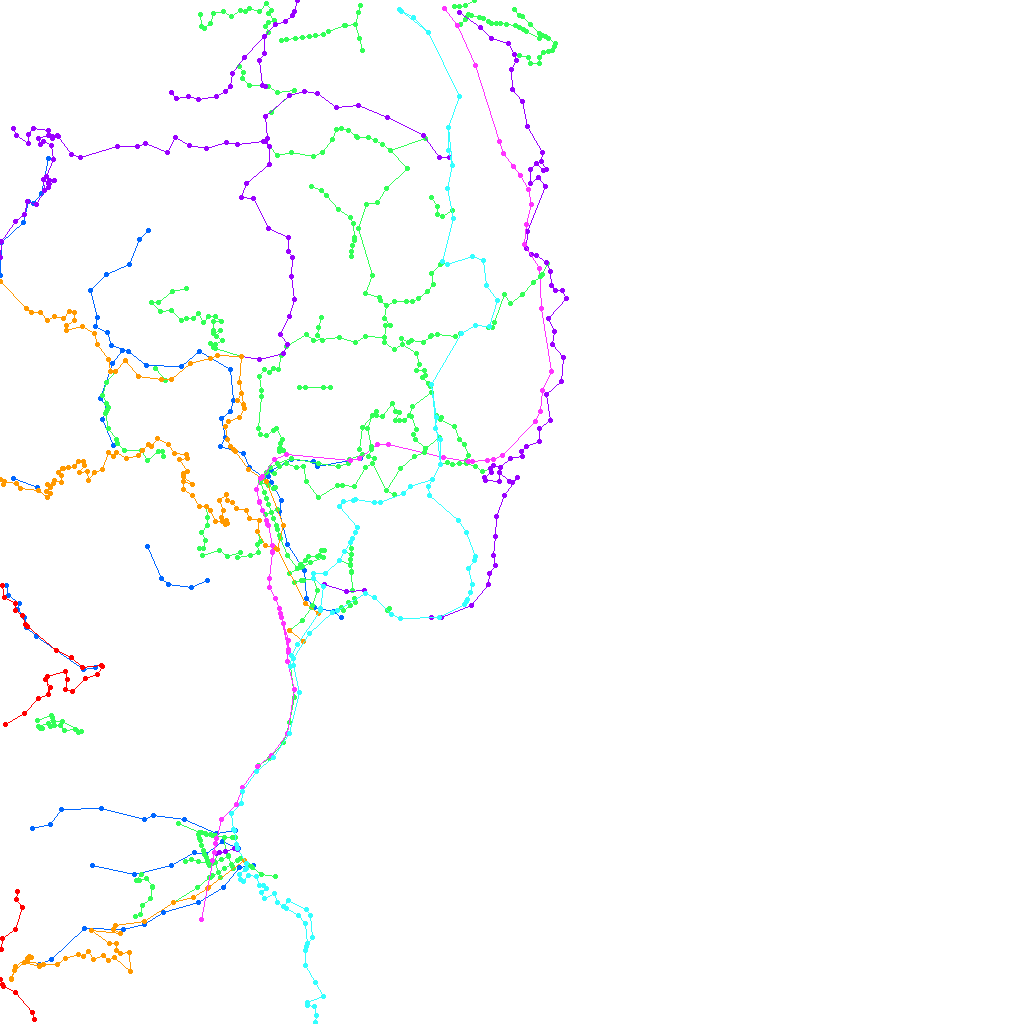

In [2]:
from PIL import Image
import cv2

# from PIL
im1 = Image.open("/notebooks/japan_tokyo_dataset/images/val/11_17.png")
results = model.predict(source=im1, save=True)  # save plotted images
print(results)
display(Image.open('/notebooks/runs/segment/predict/11_17.png'))